# HR Analytics Case Study
   XYZ Co. has over 4000 employees; however, every year, around 15% of its employees leave the company. The management believes that this level of attrition is bad for the company. 
  
  Hence, the management has contracted an **HR Analytics firm** to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.
  
  **Why the employees leave the company?**

## Step 1: <span style="color:green">Import Library</span> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()


In [4]:
data_1 = pd.read_csv("general_data.csv")
data_2 = pd.read_csv("employee_survey_data.csv")
data_3 = pd.read_csv("manager_survey_data.csv")

data_1.set_index('EmployeeID',inplace = True)
data_2.set_index('EmployeeID',inplace = True)
data_3.set_index('EmployeeID',inplace = True)

frames = [data_1, data_2, data_3]
data = pd.concat(frames, axis = 1)
data.head()

#Attrition will be the dependent variable

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## Step 2: <span style="color:green">Data Cleasing</span> 

In [236]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [237]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
JobInvolvement             False
PerformanceRating          False
dtype: bool

data fill with correlate num(medium)

In [238]:
data.fillna(data.mean(),inplace =True)

In [233]:
data.isnull().any()

YearsSinceLastPromotion    False
StockOptionLevel           False
PercentSalaryHike          False
MonthlyIncome              False
Department                 False
JobLevel                   False
JobRole                    False
Education                  False
EducationField             False
MaritalStatus              False
Age                        False
WorkLifeBalance            False
EnvironmentSatisfaction    False
JobSatisfaction            False
DistanceFromHome           False
BusinessTravel             False
YearsAtCompany             False
YearsWithCurrManager       False
TrainingTimesLastYear      False
JobInvolvement             False
PerformanceRating          False
Attrition                  False
dtype: bool

## Step 3: <span style="color:green">Exploratory Data Analysis</span> 

Create **a) boxplots** and **b) histogram** for all variables to visually show the distribution of all variables data through displaying the data quartiles and averages and easier to identify different data, the frequency of its occurrence and categories.


Here are the **4** main issues  for the **high turnover rate** that I diagnosed from the dataset, and from each main issues I have created a new list which contains the variables' column name for a clearlly visual boxplot:

**1> <span style="color:blue">Compensation and Benefits</span>** (list_1 & list_Income)

**2> <span style="color:blue">Disconnect with Personal Goals and Background</span>** (list_2)

**3> <span style="color:blue">Work Environment Satisfaction</span>** (list_3)

**4> <span style="color:blue">Relationship Satisfaction</span>** (list_4)

### a) Boxplots:

In [178]:
#create the lists for 4 main issues:
list_1 = ['YearsSinceLastPromotion', 'StockOptionLevel', 'PercentSalaryHike']
list_Income = ['MonthlyIncome']
list_2 = ['Department', 'JobLevel', 'JobRole','Education','EducationField','MaritalStatus','Age']
list_3 = ['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction','DistanceFromHome','BusinessTravel','YearsAtCompany',
         'YearsWithCurrManager','TrainingTimesLastYear']
list_4 = ['JobInvolvement','PerformanceRating']

Text(0.5, 1.0, 'Boxplot of Attributes for Compensation and Benefits')

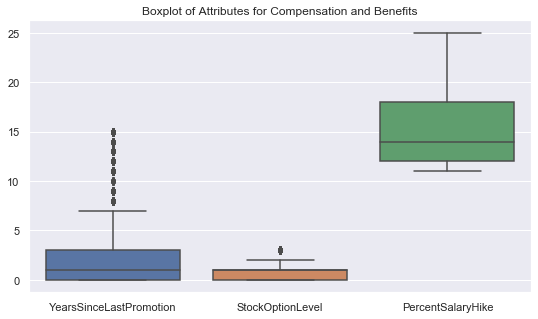

In [179]:
plt.figure(figsize = (9,5))
sns.boxplot(data = data[list_1])
plt.title('Boxplot of Attributes for Compensation and Benefits')

Text(0.5, 1.0, 'Boxplot for Income')

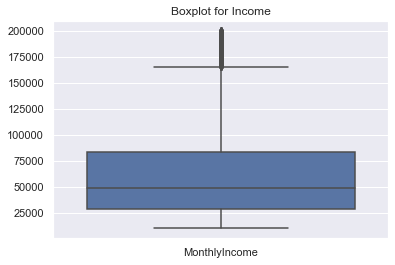

In [180]:
sns.boxplot(data = data[list_Income])
plt.title('Boxplot for Income')

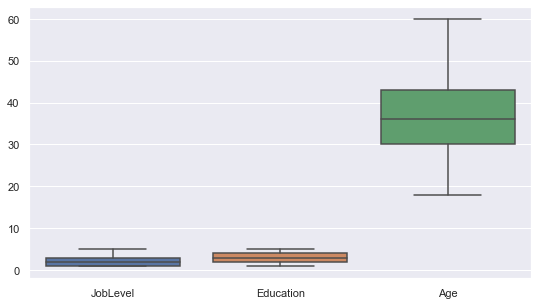

In [181]:
plt.figure(figsize = (9,5))
sns.boxplot(data = data[list_2])

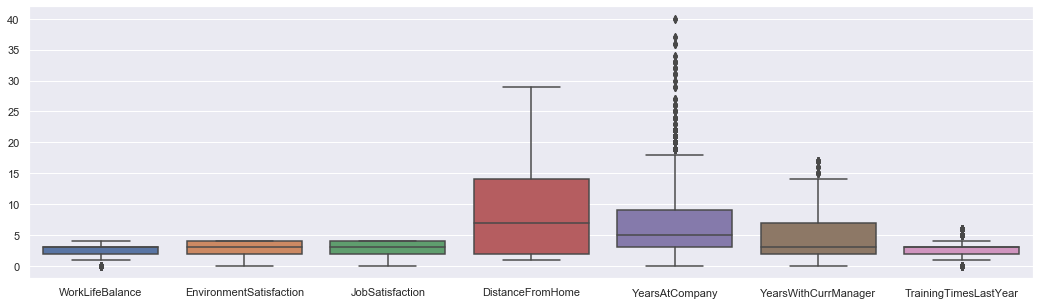

In [182]:
plt.figure(figsize = (18,5))
sns.boxplot(data = data[list_3])

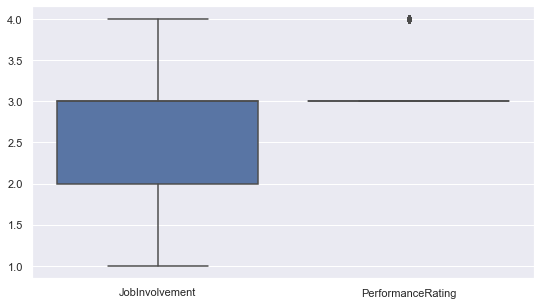

In [183]:
plt.figure(figsize = (9,5))
sns.boxplot(data = data[list_4])

In [184]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

### b) Histogram plotting:
First, we need to convert all the Categorical data into numerical data by using sklearn 'LabelEncoder'

In [190]:
#Convert all the Categorical data into numerical data 
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['BusinessTravel'] = labelEncoder_X.fit_transform(data['BusinessTravel'])
data['Department'] = labelEncoder_X.fit_transform(data['Department'])
data['EducationField'] = labelEncoder_X.fit_transform(data['EducationField'])
data['JobRole'] = labelEncoder_X.fit_transform(data['JobRole'])
data['MaritalStatus'] = labelEncoder_X.fit_transform(data['MaritalStatus'])

In [191]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
data['Attrition'] = label_encoder_y.fit_transform(data['Attrition'])

In [192]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition_binary,BusinessTravel_binary
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,0,2,2,6,2,1,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,0,0
2,31,1,1,1,10,1,1,1,Female,1,...,5,1,4,3.0,2.0,4.0,2,4,0,0
3,32,0,1,1,17,4,4,1,Male,4,...,5,0,3,2.0,2.0,1.0,3,3,0,0
4,38,0,0,1,2,5,1,1,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,0,0
5,32,0,2,1,10,1,3,1,Male,1,...,6,0,4,4.0,1.0,3.0,3,3,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE70A18408>,
      dtype=object)

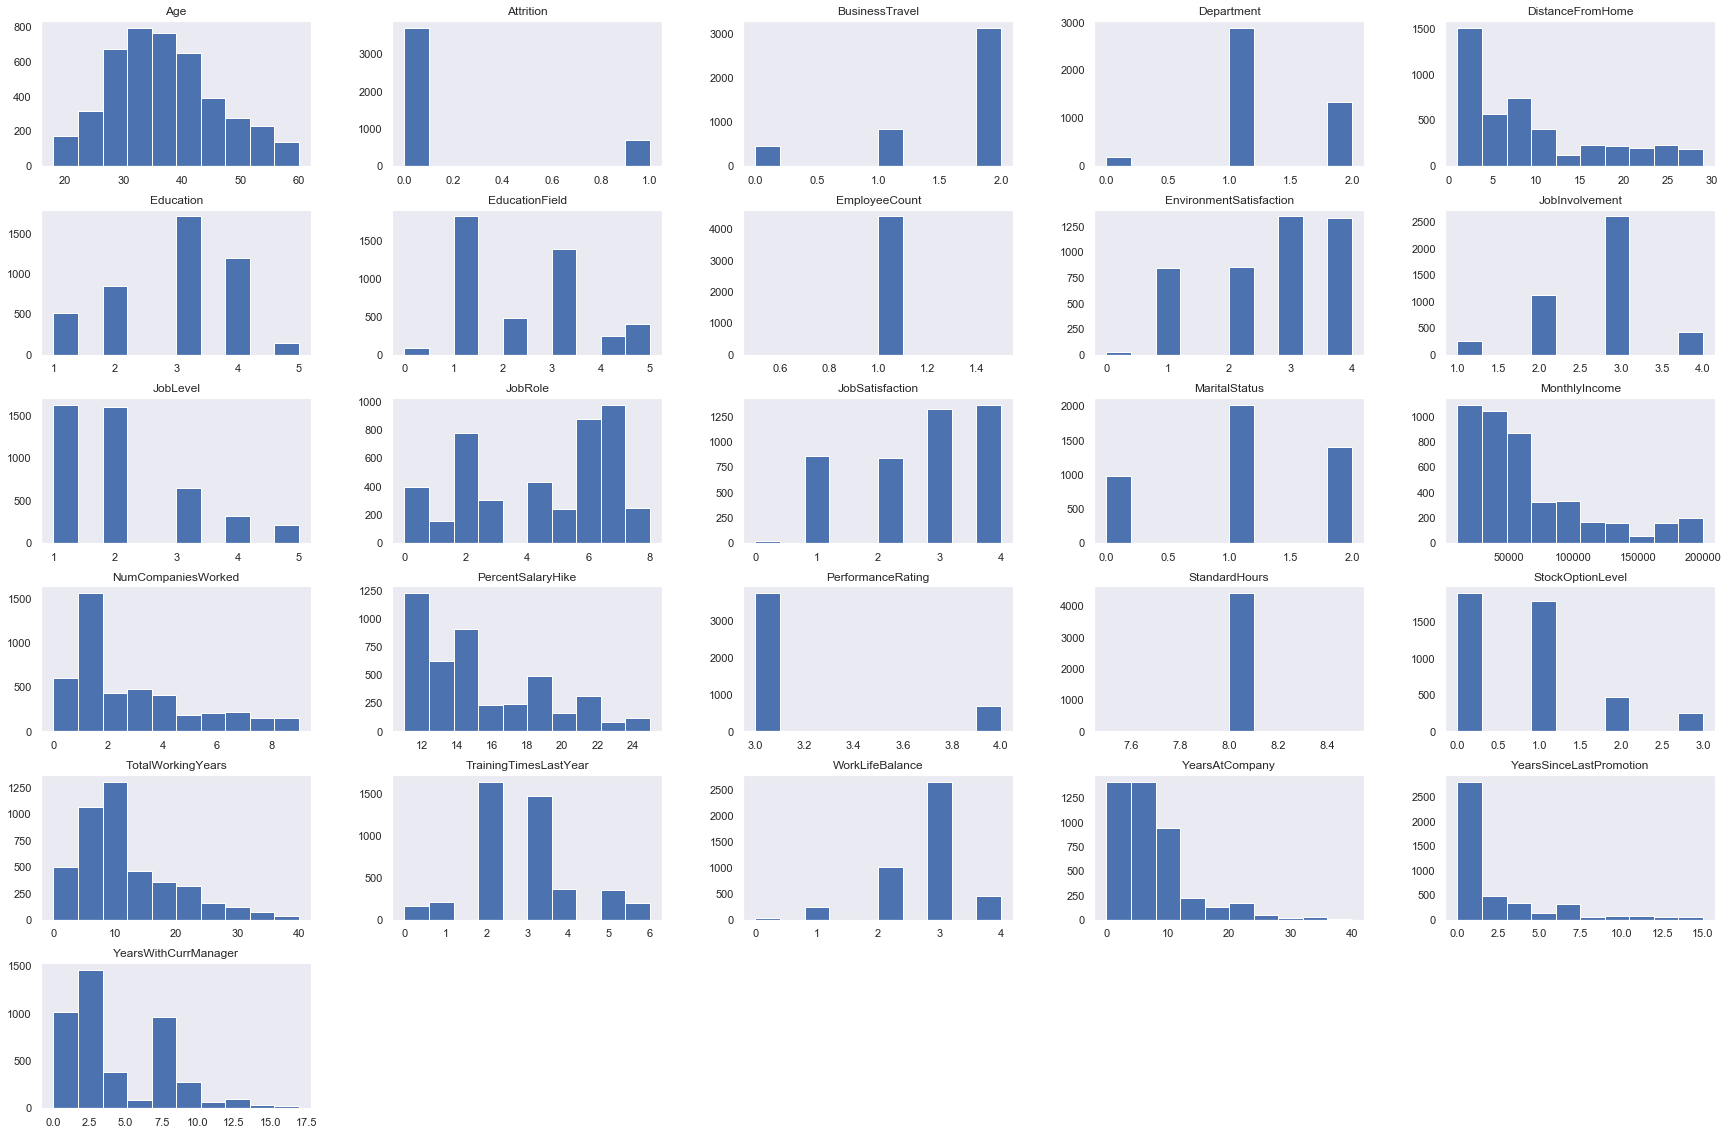

In [188]:
data.hist(figsize=(30,20),grid = False)

In [17]:
#data.hist(figsize=(30,20),grid = False)
#missing some variables
data.hist(figsize=(30,20),grid = False)
#Create a new column to transfer the data type to Num 
data['Attrition_binary']= [1 if i == 'Yes' else 0 for i in data.Attrition]
#1 elif i == 'Travel_Rarely' 
data['BusinessTravel_binary']= [2 if i == 'Travel_Frequently' elif if i == 'Travel_Rarely' 1 else 0 for i in data.BusinessTravel]
#data['Department_binary'] = 
#data['JobRole_binary'] = 
#data['EducationField_binary'] = 
#data['MaritalStatus_binary'] = 

SyntaxError: invalid syntax (<ipython-input-17-55fd247fa476>, line 7)

## Step 4: <span style="color:green">Issues Tree with Insights</span> 
1) Using **seaborn pairplot** to analysis the relationship between the variables list to each issues.

2) Correlation with **seaborn heatmap** for all variables

- Create a new list which contains all variables including column **Attrition** 

4) **Seaborn countplot** to count when x = 'Attrition', what's the amount for:

- Varibles of Attrition
- Job level

3) Compare the the **p-value** by using T-test to initial the strength of our hypothesis. 


### 1)Seaborn- Pairplot 
### **Issue 1:  <span style="color:blue">Compensation and Benefits</span>**

In [200]:
#Since column 'Attrition' will be the dependent variable which need to add the column 'Attrition' to all the Lists created.
#And added MonthlyIncome to Issue 1: Compensation and Benefits
#Substitude data type of string columns to number.
list_1 = ['YearsSinceLastPromotion', 'StockOptionLevel', 'PercentSalaryHike','MonthlyIncome','Attrition']
list_2 = ['Department', 'JobLevel', 'JobRole','Education','EducationField','MaritalStatus','Age','Attrition']
list_3 = ['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction','DistanceFromHome','BusinessTravel',
          'YearsAtCompany','YearsWithCurrManager','TrainingTimesLastYear','Attrition']
list_4 = ['JobInvolvement','PerformanceRating','Attrition']

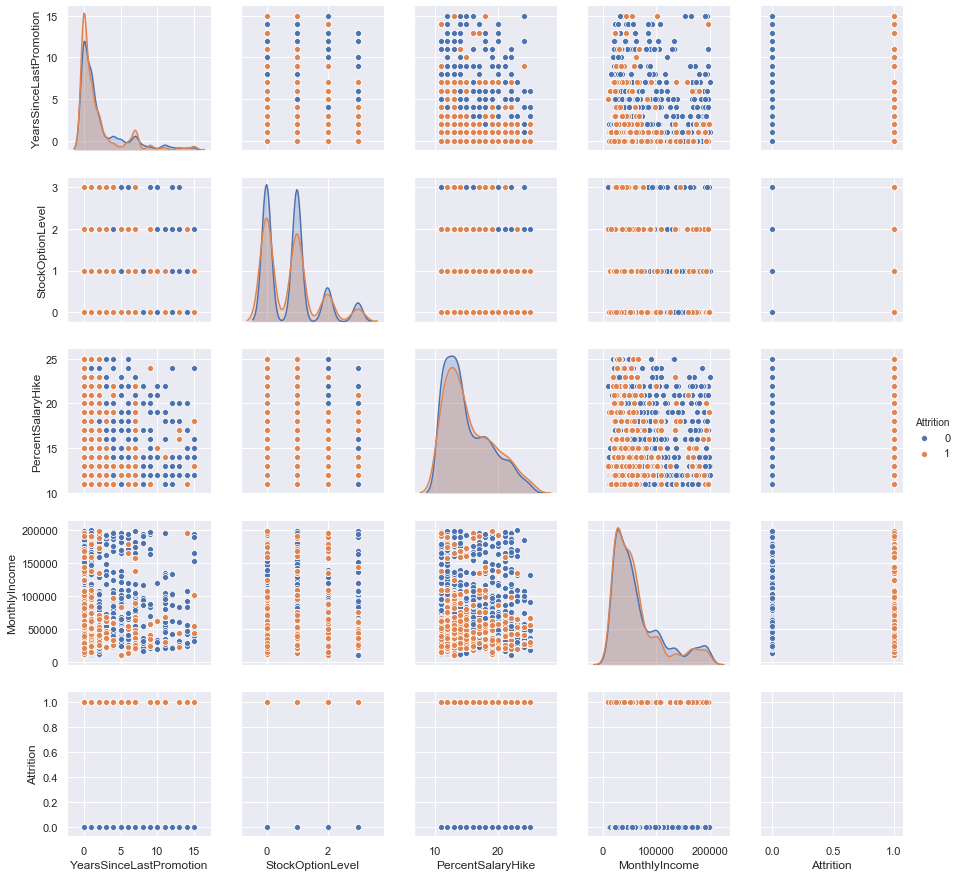

In [201]:
sns.pairplot(data[list_1], hue='Attrition')

#### Findings:
The employees are still stay on the company because they were offered with:

**1)** Higher rate of promotion,

**2)** Higher stock options

**3)** Higher percentage of salary hike and monthly income 

### **Issue 2: <span style="color:blue">Disconnect with Personal Goals and Background</span>**

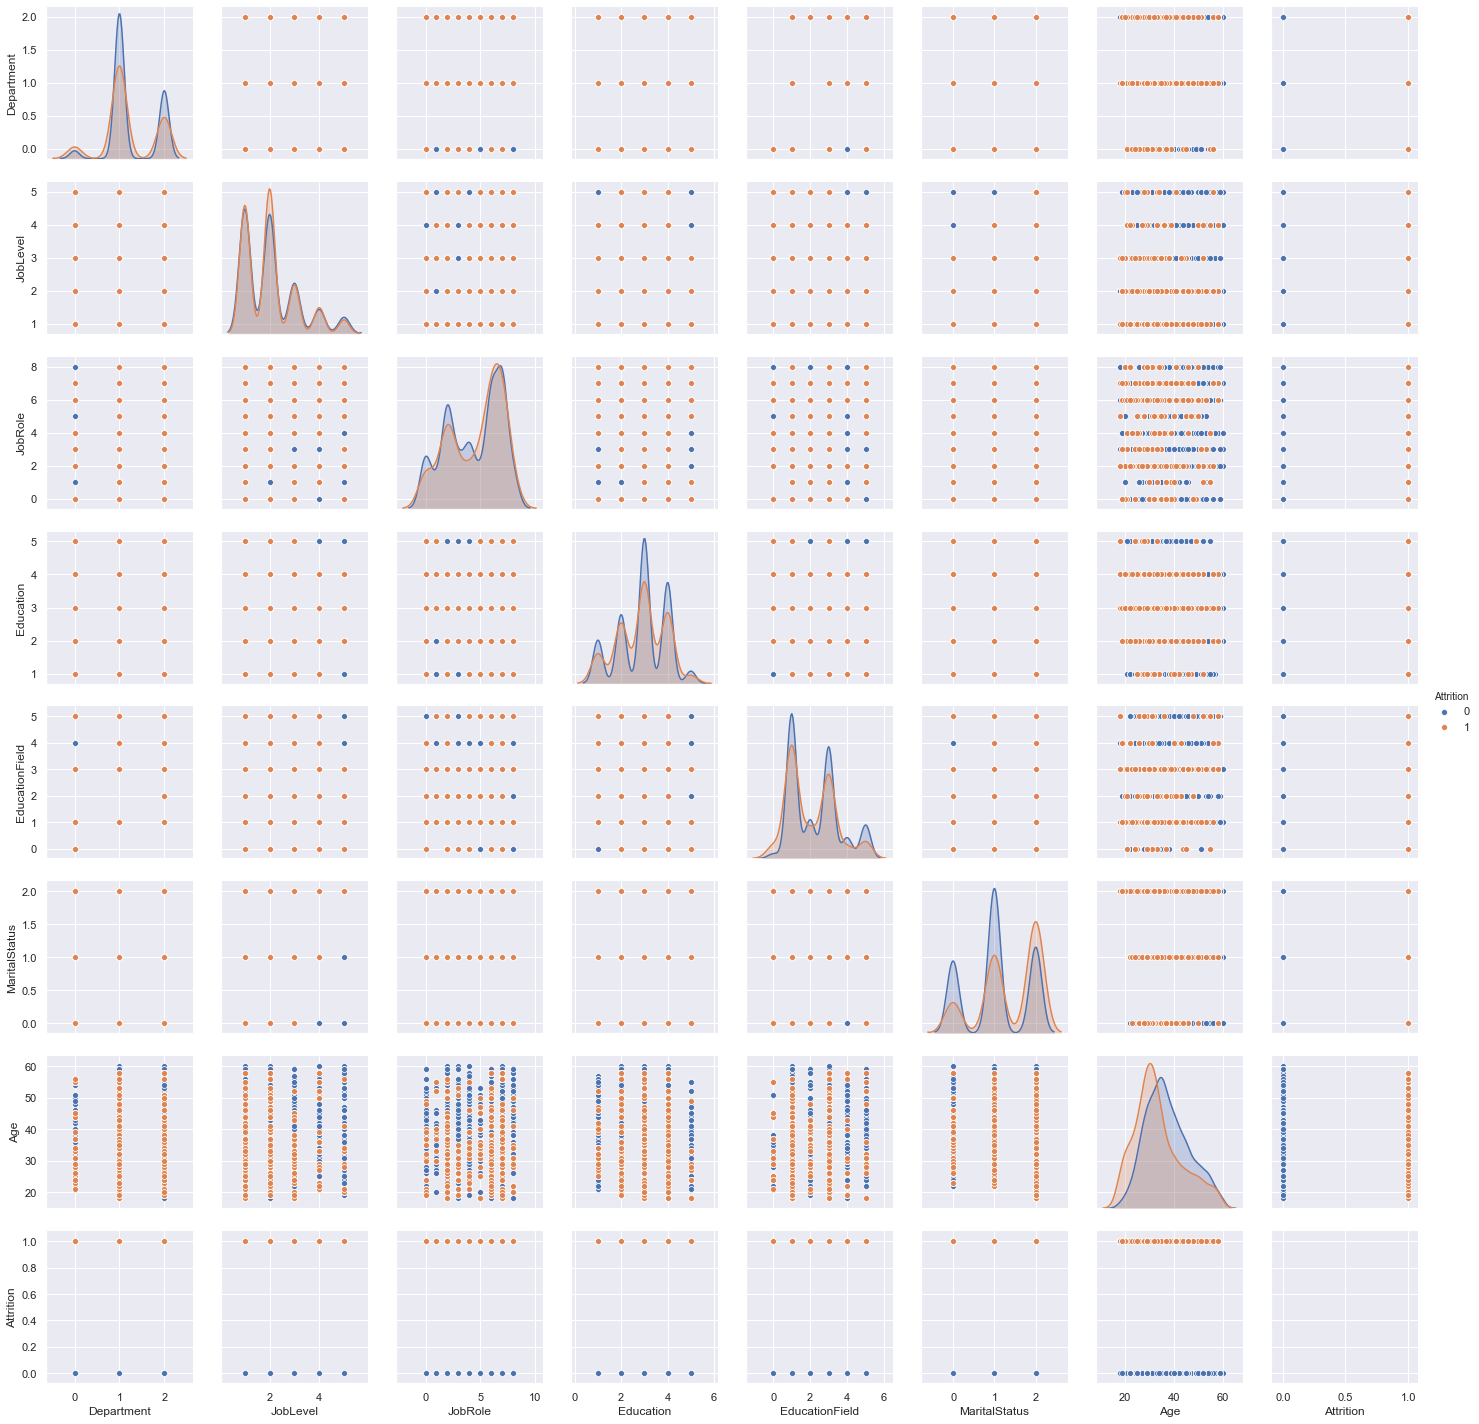

In [202]:
sns.pairplot(data[list_2], hue='Attrition')

#### Findings:
The employees are still stay on the company because they were offered with:

**1)** Higher job level position and older age

**2)** Higher academic degree


### **Issue 3 <span style="color:blue">Work Environment Satisfaction</span>**

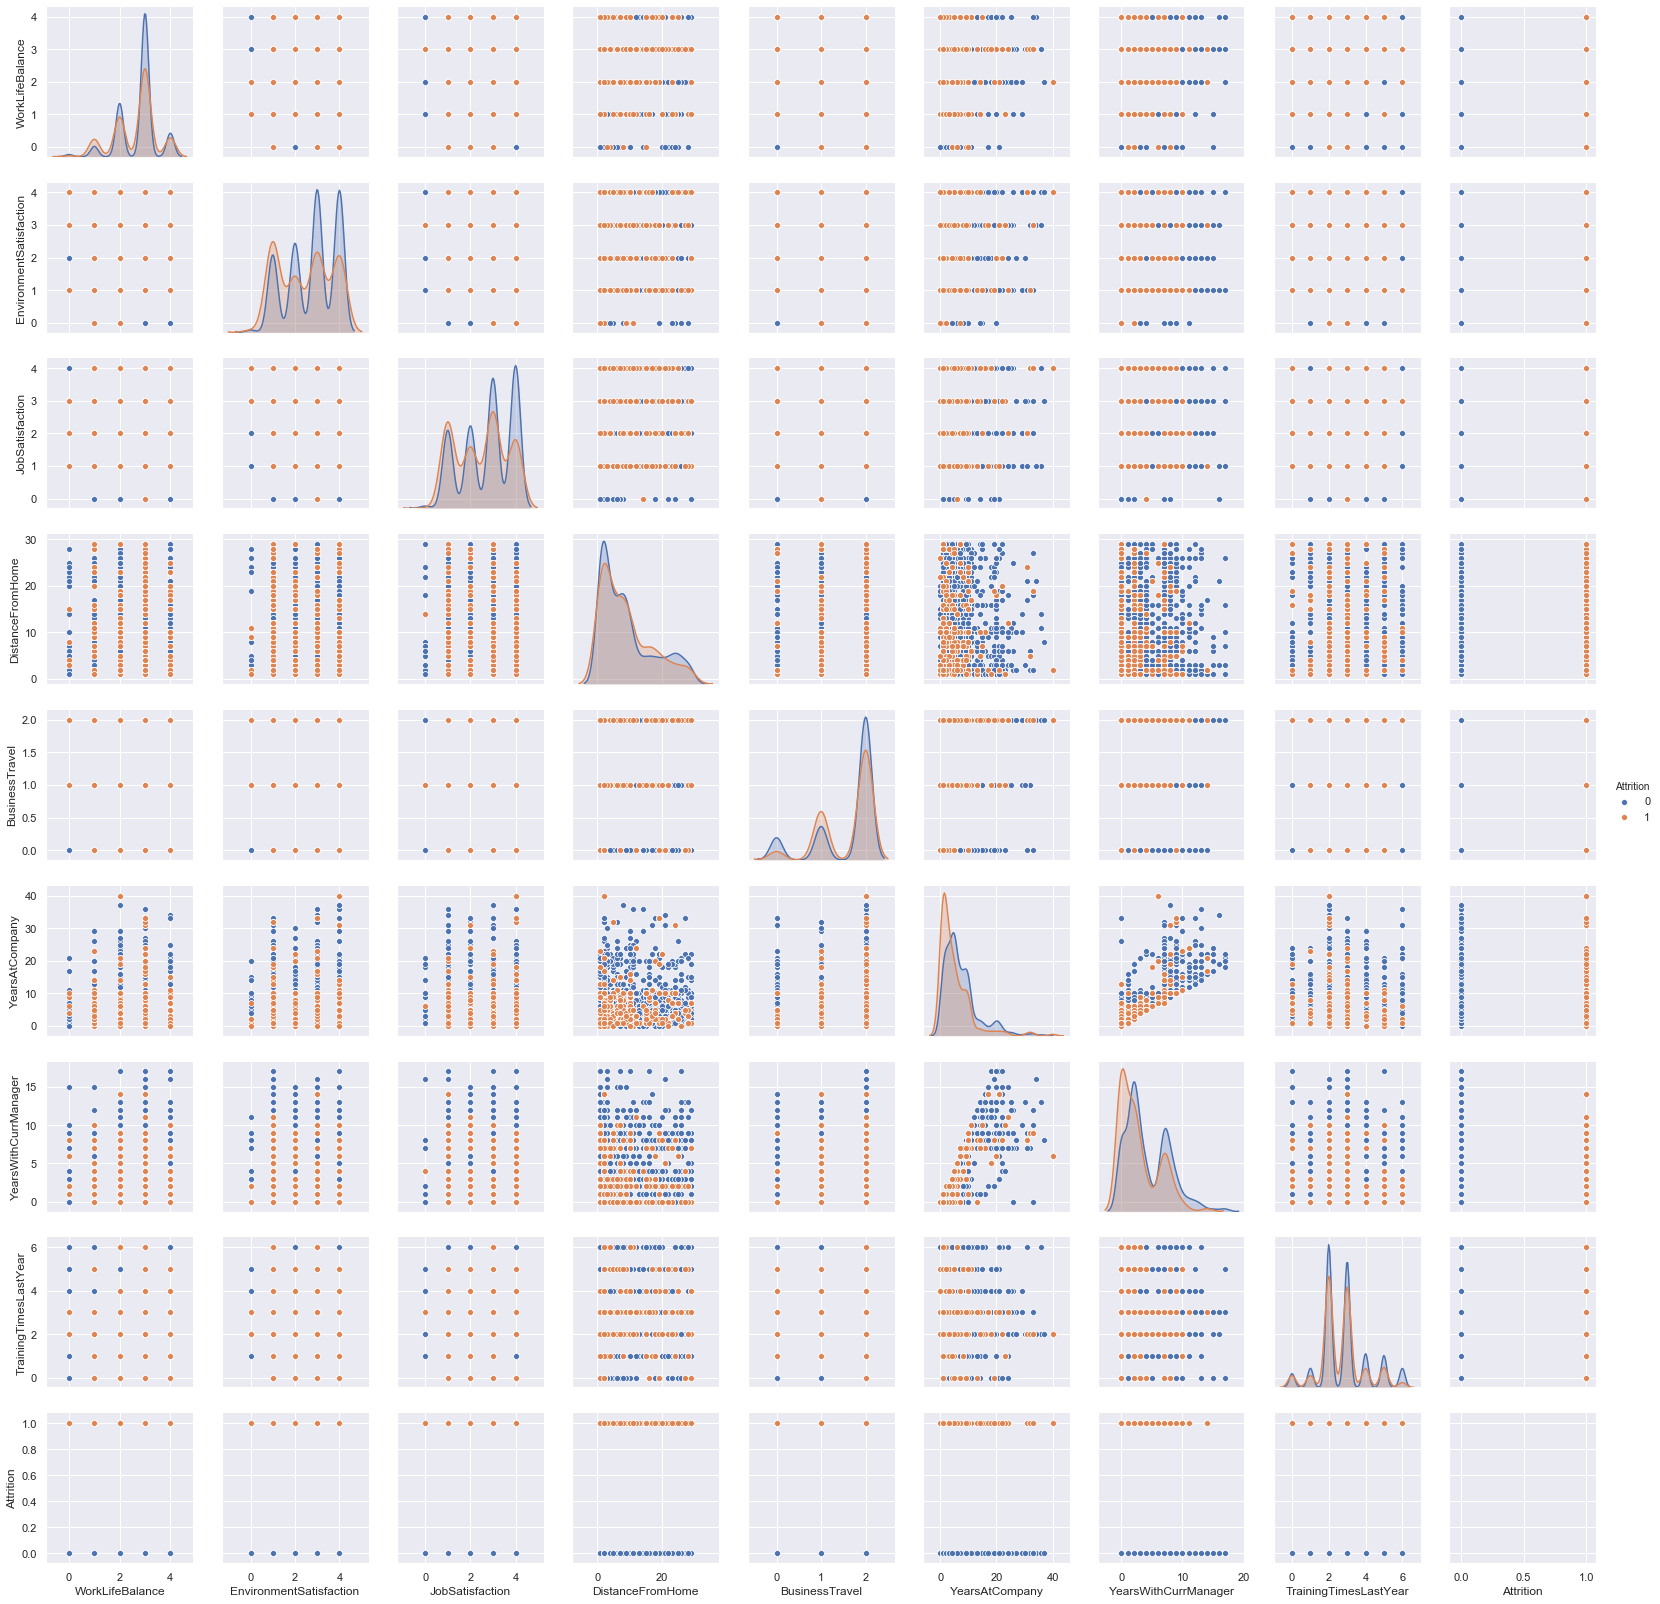

In [203]:
sns.pairplot(data[list_3], hue='Attrition')

#### Findings
The employees are still stay on the company because:

**1)** Shorter distance from home

**2)** Longer time with the company and current manager

**3)** Higher rating of job satisfaction, work-life balance and environment satisfaction through employees survey.

### **Issue 4:  <span style="color:blue">Relationship Satisfaction</span>**

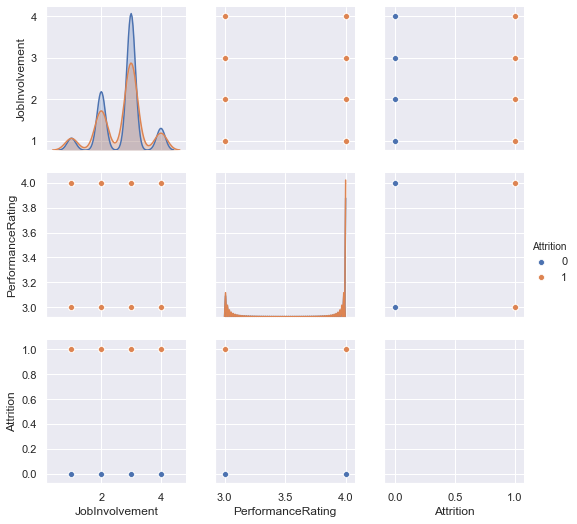

In [204]:
sns.pairplot(data[list_4], hue='Attrition')

#### Findings

The employees are still stay on the company because:

- Much more job involvement attitude they put, less employees quit


**From the above graphs we get an idea of what attrition among these groups look like but we cannot deduce that what features effect the attrition most. For that we can use corelation matrix which gives corelation of each of these groups with one another, also we can deduce that what factors are most effecting the attrition**



### 2) Seaborn Heatmap - Correlation for All

Text(0.5, 1, 'Correlation for All Variables with Heatmap')

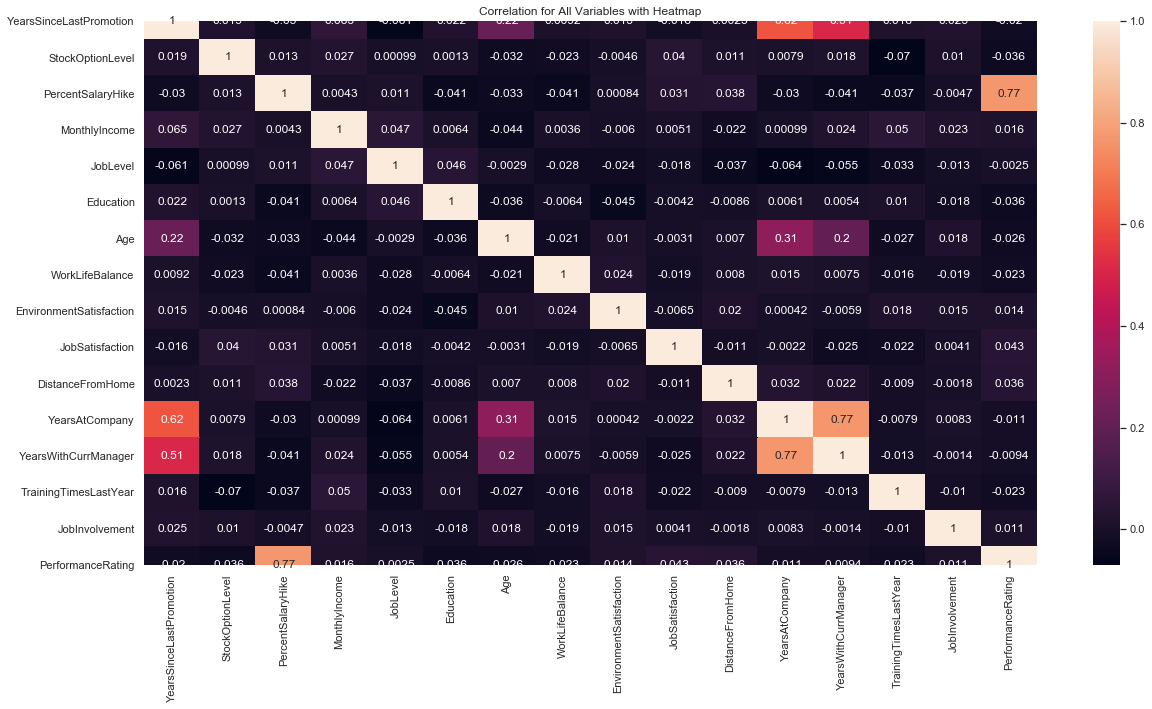

In [5]:
#create a new list with all variables including 'Attrition'
list_all = ['YearsSinceLastPromotion', 'StockOptionLevel', 'PercentSalaryHike','MonthlyIncome',
           'Department', 'JobLevel', 'JobRole','Education','EducationField','MaritalStatus','Age',
            'WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction','DistanceFromHome','BusinessTravel',
          'YearsAtCompany','YearsWithCurrManager','TrainingTimesLastYear','JobInvolvement','PerformanceRating','Attrition'] 
data = data[list_all]
corr = data.corr()
fig,axes = plt.subplots(figsize = (20,10))
sns.heatmap(corr,annot = True)
plt.title('Correlation for All Variables with Heatmap')

**From the above correlation matrix it is clear that variable of 'Years at company', 'Percentage salary Hike', and 'Years with Current Manager' are highly correlated with 'Attrition' than others. Let's boxplot the data to have a clearly look**

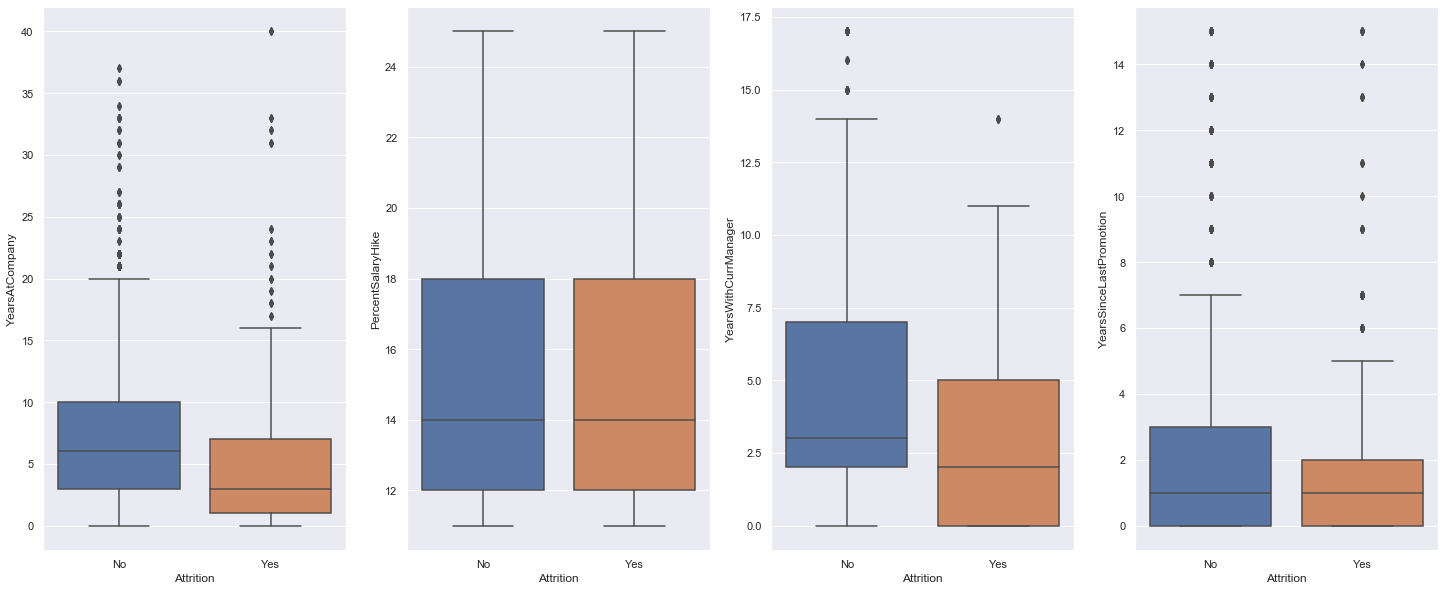

In [28]:
plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data);
plt.subplot(1,4,2)
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=data);
plt.subplot(1,4,3)
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=data);
plt.subplot(1,4,4)
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data);

**From the graph it can be seen that：**

Those employees who left Employees were working for less years in the company, current manager and promotions.

### 3) Seaborn - Countplot

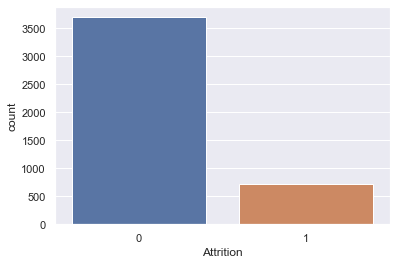

In [164]:
sns.countplot(x = 'Attrition', data = data)

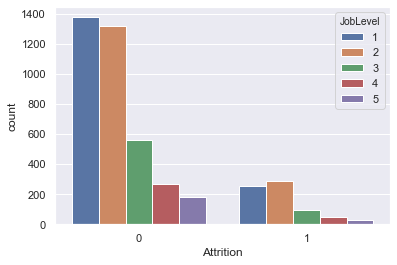

In [165]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel")

### 4) P-value

- Usng T-test to calculate P-value

In [ ]:
from scipy import stats

## Insights 

**From the above plot, it is evident that some features impact the attrition more than others and those features are:**

- Years at company

- Percentage salary Hike

- Years with Current Manager

- Job Level

- Distance from home

- Years Since Last Promotion

- Monthly Income